In [13]:
import config
import numpy as np 
import matplotlib.pyplot as plt
from aml import graph_layout
import torch
from sklearn import decomposition
from sklearn import manifold
from Alg.solving_algorithm import ModelGenerator
from CustomModels.my_models import Integrator
import os
from Losses.Losses import *
from tqdm import tqdm
from aml.plotting import *
from matplotlib import cm
import matplotlib

In [2]:
N = 1000 
adj_m =  torch.load(config.Phi_adj_matrix)
all_distances = np.zeros(shape=(int(N*(N-1)/2),))
k_ = 0
for i in range(1,N-1):
    for j in range(i,N):
        all_distances[k_] = adj_m[i][j]
        k_ +=1

(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'center': '. n of unique values 498502'}, xlabel='nan rate 0.0'>)

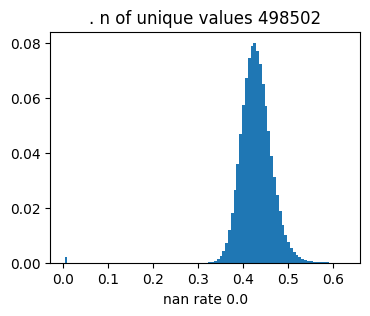

In [11]:
plot_float_distribution(all_distances)

using device cpu


100%|██████████| 550/550 [02:52<00:00,  3.18it/s]


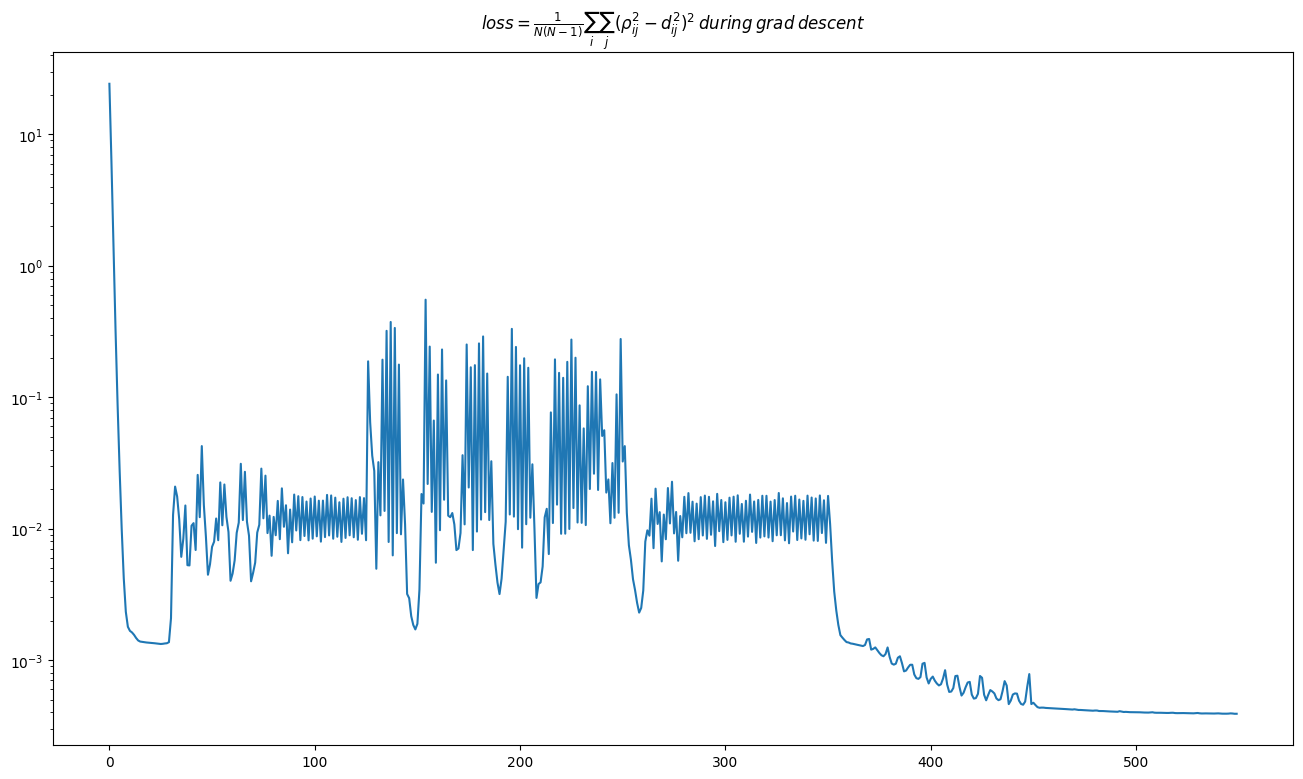

In [3]:
gr_model = graph_layout.GraphOnAPlane(adj_m,size_of_output_space = 30)
gr_model.fit()
gr_model.plot_loss()
positions = gr_model.get_pos()

In [4]:
print(positions.shape)
torch.save(positions, config.Phi_vector_representation)

(1000, 30)


In [5]:
colors_ = ['b' for i in range(len(positions))]
unique_labels_colors_ = ['b']
unique_labels_ = [0]

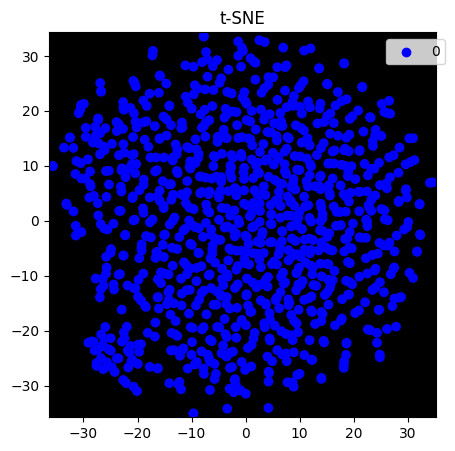

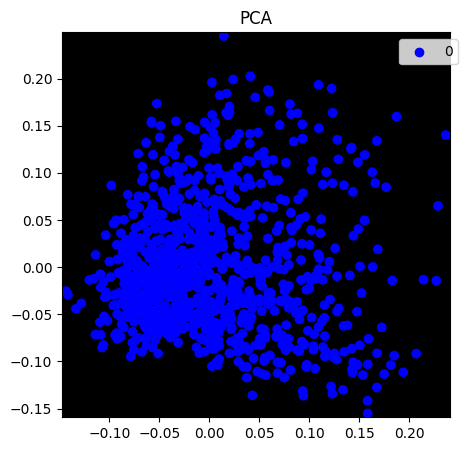

In [6]:
dim_reduction_alg1 = manifold.TSNE(n_components=2)
dim_reduction_alg2 = decomposition.PCA(n_components=2)
positions_1 = dim_reduction_alg1.fit_transform(positions)
positions_2 = dim_reduction_alg2.fit_transform(positions)
N_ = len(positions)
fig,ax1 = graph_layout.cluster_plot((5,5), positions_1, colors_of_points=colors_,color_for_labels=unique_labels_colors_,labels_for_colors=unique_labels_)
fig,ax2 = graph_layout.cluster_plot((5,5), positions_2, colors_of_points=colors_,color_for_labels=unique_labels_colors_,labels_for_colors=unique_labels_)
ax1.set_title('t-SNE')
ax2.set_title('PCA')
plt.show()

compute quality criterion of p

In [3]:
mg = ModelGenerator(rules=config.rules,
                            cache_dir=config.Phi_cache_dir,
                            clear_cache=False)
all_p = [torch.load(os.path.join(mg.cache_dir, 'distrib4D_{}.txt'.format(i))) for i in range(N)]

In [4]:
shared_integration_supports = Integrator(dir_=config.integrator_dir,
                                        shared_data=mg.shared_data,
                                        clear_cache=True).shared_integration_supports


     num_of_rect_in_intersection 17090


In [5]:
L = np.zeros(shape=(N,))
for i in tqdm(range(N)):
    p_ = all_p[i]
    L_i = get_L_Distrib4D(p_, shared_integration_supports)
    L[i] = L_i

100%|██████████| 1000/1000 [11:47<00:00,  1.41it/s]


(<Figure size 400x300 with 1 Axes>,
 <Axes: title={'center': '. n of unique values 1000'}, xlabel='nan rate 0.0'>)

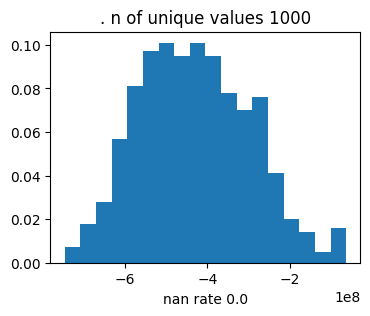

In [6]:
plot_float_distribution(L)

In [8]:
torch.save(L, os.path.join(config.task_dir, 'L1_for_Phi.txt'))

In [10]:
positions = torch.load(config.Phi_vector_representation)
print(positions.shape)

(1000, 30)


In [21]:
dim_reduction_alg1 = manifold.TSNE(n_components=3)
dim_reduction_alg2 = decomposition.PCA(n_components=3)
positions_1 = dim_reduction_alg1.fit_transform(positions)
positions_2 = dim_reduction_alg2.fit_transform(positions)
print(positions_1.shape)

(1000, 3)


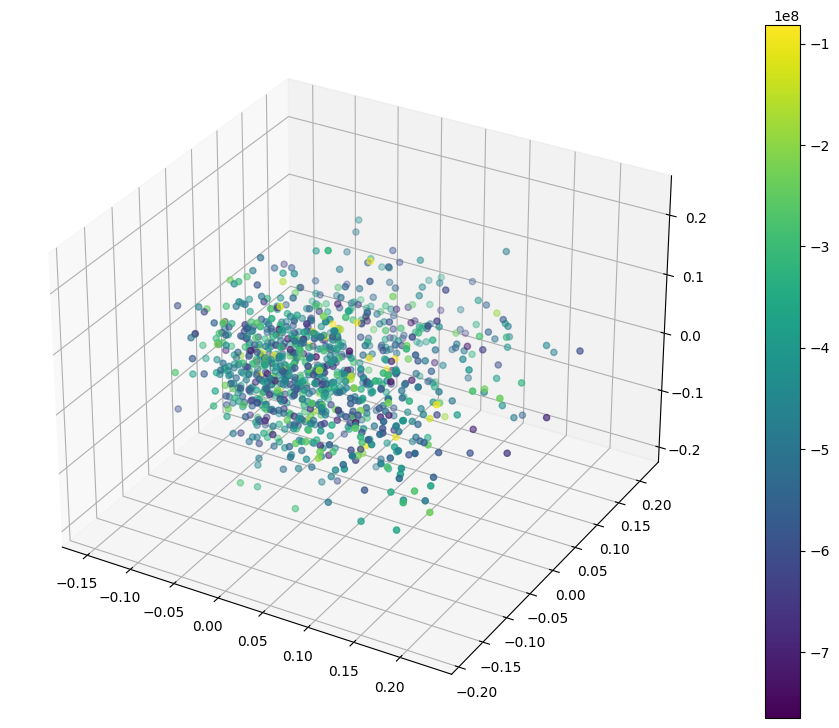

In [24]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
fig.set_size_inches(16,9)
norm = matplotlib.colors.Normalize(vmin=min(L), vmax=max(L))
m = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ax.scatter(xs = [positions_2[i][0] for i in range(N)],ys= [positions_2[i][1] for i in range(N)],
           zs = [positions_2[i][2] for i in range(N)],c=[m.to_rgba(L[i]) for i in range(N)])
plt.colorbar(m, ax=ax)

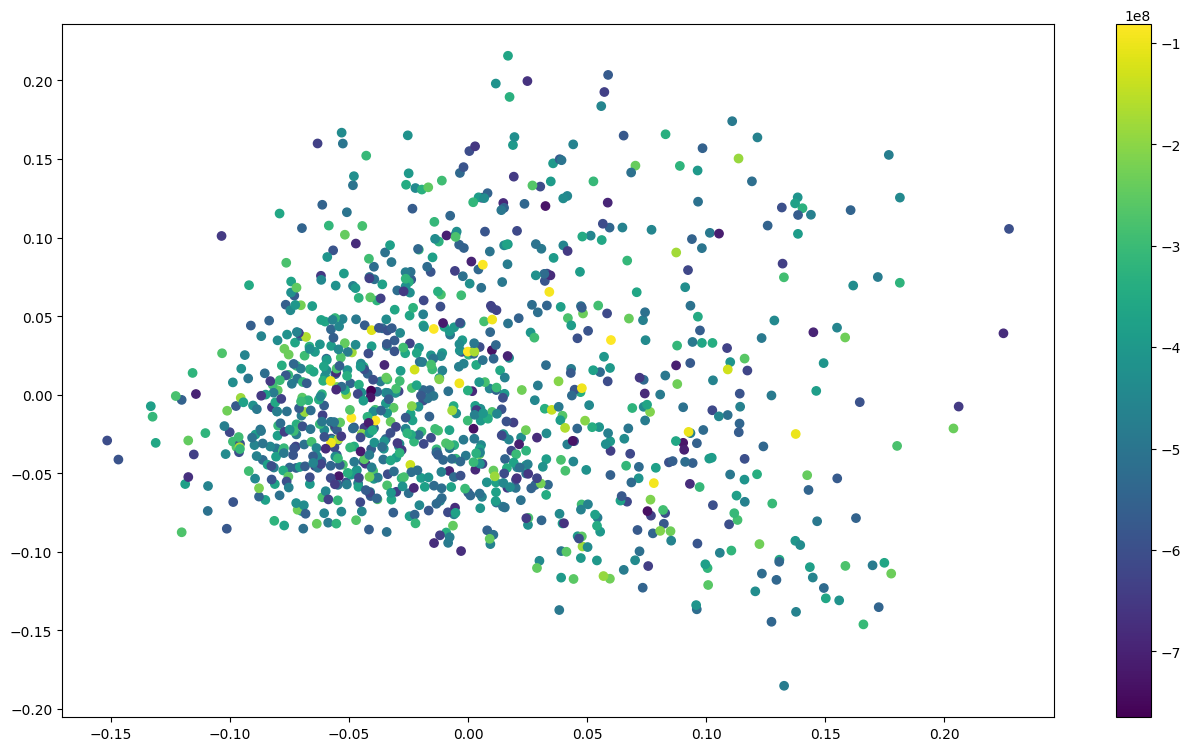

In [25]:
fig,ax = plt.subplots()
fig.set_size_inches(16,9)
norm = matplotlib.colors.Normalize(vmin=min(L), vmax=max(L))
m = cm.ScalarMappable(norm=norm, cmap=cm.viridis)
ax.scatter(x = [positions_2[i][0] for i in range(N)],y= [positions_2[i][1] for i in range(N)],c=[m.to_rgba(L[i]) for i in range(N)])
plt.colorbar(m, ax=ax)